In [309]:
import torch
torch.__version__

'2.6.0+cu124'

#Classification Problem

- Binary Classification- ex: spam detection (0/1)
- Multi Class Classification - more than 2 classes
- Multi label Classification - to label relavant categories


`imageNet` - popular dataset


## Classification Input and Outputs
- resize the input image (W,H,color_channels)-> numerically represent a image = `Numerical encoding`

- outputs are prediction probability (0 to 1 => False to True) then tranform these probability into the labels

input_shapes =[batch_size, color_channels,width,height ]

output_shape=[2] -> 2 labels









## Architecture of a Classification model

1. Hyperparameters
  - input layer shape : number of feaures
  - hidden layers
  - neurons per hidden layer (10 to 512)
  - output layer shape -> 1 per class
  - hidden layer activation
  - output activation (sigmoid, softmax etc)
  - loss function `torch.nn.BCELoss`
  - Optimizer `torch.optim`

## Toy dataset Classification-make_circle dataset   

## 1. Data (Custom Dataset)

In [310]:
import sklearn
from sklearn.datasets import make_circles
#make_circles : This function is designed to generate a synthetic dataset of points arranged in concentric circles,
n_samples =1000

#create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [311]:
X,len(X)

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 1000)

In [312]:
y,len(y)

(array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 

In [313]:
import pandas as pd
circle=pd.DataFrame({"X0":X[:,0],
                     "X1":X[:,1],
                     "label":y})

 #X[:, 0] selects all rows from the first column of the X array
 #X[:, 1] selects all rows from the second column
circle.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


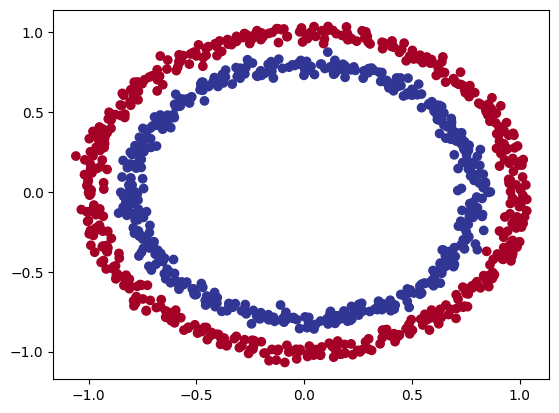

In [314]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

#### 1.1 Check input and output shapes

In [315]:
X.shape,y.shape

((1000, 2), (1000,))

In [316]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [317]:
print(f'Values for sameple X: {X[0]}')
print(f'Values for sample y: {y[0]}')

Values for sameple X: [0.75424625 0.23148074]
Values for sample y: 1


#### 1.2 Convert into tensors adn create train and test splits

In [318]:
X.dtype, y.dtype

(dtype('float64'), dtype('int64'))

In [319]:
#convert into tensors for the NN
X = torch.from_numpy(X).type(torch.float)

y = torch.from_numpy(y).type(torch.float)

In [320]:
X[:5]

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])

In [321]:
y[:5]

tensor([1., 1., 1., 1., 0.])

In [322]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.2, #20% will be test
                                                  random_state=42)


In [323]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [324]:
X_train[:5],X_train.shape

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 torch.Size([800, 2]))

## 2. Build a model
1. Build device agonistic code- cuda or cpu
2. Constrcut a model
3. Define loss function and optimizer
4. Training and testing loop
5. Eval

In [325]:
from torch import nn

#device agnostic code
device= "cuda" if torch.cuda.is_available() else "cpu"
device # no GPU

'cpu'

### 2.1 Build the model class

In [326]:
# Constrcution a model

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__() #calls the cpmstructor the parent class

    # Linear layers capacble of handling the shapes of  DATA
    #shape of X=(800,2) so in_features=2
    self.layer_1= nn.Linear(in_features=2,out_features=5) #takes 2 features ans scales it to 5 feaures

    self.layer_2=nn.Linear(in_features=5,out_features=1) #takes 5 features fro, layer 1 and gives out 1 shaped restuls

  #forward method
  def forward(self,x):
    return self.layer_2(self.layer_1(x))
   #x-> layer_1 ->layer_2-> output

In [327]:
# Create instances of model

model_0=CircleModelV0().to(device)

In [328]:
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [329]:
device

'cpu'

In [330]:
next(model_0.parameters())

Parameter containing:
tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188]], requires_grad=True)

#### nn.Sequential is a convenient way to create a model by stacking layers and activation functions in a sequential orde

Why use Sequential?

More concise syntax for linear layer sequences

Automatically handles forward pass ordering

Easier for simple architectures (no need for custom class)

In [331]:
#Let's replicte the model above using nn.sequential

model_0= nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [332]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [333]:
#Make Predictions
with torch.inference_mode():
  untrained_preds=model_0(X_test.to(device))

len(untrained_preds), untrained_preds.shape

(200, torch.Size([200, 1]))

### 2.2 Loss fucntion  and optimizer
for classification problem we can use Binary cross entropy or categorical cross entropy

`torch.nn.BCELossWithLogit` logit(p)= log(p/1-p)

`nn.BCELoss`

In [334]:
#Loss function
loss_fn = nn.BCEWithLogitsLoss() #has sigmoid activation fucntion built in

# optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


In [335]:
#evaluation matric: Accuracy - out of 100 examoples, what percentage does model get it right?
def Accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()

  acc=correct/len(y_pred)*100

  return acc
#

## 3.Training loop

1. forward pass
2. calculate the loss
3. zero gradients
4. perform backprop on loss
5. optimizer step()

### 3.1 going from raw logits -> prediction probabilities -> prediction labels

A **logit** is the raw, unnormalized output of a model before applying any activation function.

- In deep learning, it represents the model's prediction in its most basic numerical form, which can then be transformed into probabilities (e.g., using sigmoid for binary classification or softmax for multi-class classification).

- logit function maps a probability
p (between 0 and 1) to an unbounded real number (from -inf to +inf)

- They are inverses:
    1. Sigmoid(logit) = Probability
    2. Logit(probability) = Logit

In [336]:
with torch.inference_mode():
  y_logits = model_0(X_test[:5])

y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [337]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [338]:
#use sigmoid to make the y_logits into prediction probs
y_pred_prob = torch.sigmoid(y_logits)
y_pred_prob

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]])

In [339]:
torch.round(y_pred_prob) # 0 and 1s

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]])

### 3.2 Decision boundaries can be created

`y_pred_probs`> 0.5 -> `y=1`

`y_pred_probs`< 0.5 ->  `y=1`

In [340]:
y_preds = torch.round(y_pred_prob)
#in full

y_pred_labels= torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.])

### 3.2 Buulding a training and testing loop

In [341]:
EPOCHS=100
torch.manual_seed(42)


for epoch in range(EPOCHS):
  model_0.train()
  # forward pass
  y_logits =model_0(X_train.squeeze())

  y_pred=torch.round(torch.sigmoid(y_logits)) #logits-> probability

  #loss funciton
  loss= loss_fn(y_logits,y_train.unsqueeze(dim=1)) #since it is BCEWithLoitsLoss() -> wants logits as input

  accuracy= Accuracy_fn(y_true=y_train,y_pred=y_pred.squeeze()) # Squeeze y_pred here to match y_train shape for accuracy calculation

  optimizer.zero_grad()

  loss.backward() #back propagation

  optimizer.step() #optimizer step- SGD

  model_0.eval()
  with torch.inference_mode():
    # forward pass
    test_logits=model_0(X_test.to(device))

    test_pred=torch.round(torch.sigmoid(test_logits))

    #test loss
    test_loss=loss_fn(test_logits,y_test.unsqueeze(dim=1)) # Unsqueeze y_test here as well

    test_acc=Accuracy_fn(y_true=y_test,y_pred=test_pred.squeeze()) # Squeeze test_pred here

  if epoch % 10 == 0: # Print every 10 epochs
    print(f"epoch:{epoch} Loss:{loss:.5f} accuracy:{accuracy:.2f}% | test acc:{test_acc:.2f}% | test loss:{test_loss:.5f}")

epoch:0 Loss:0.69796 accuracy:51.88% | test acc:58.00% | test loss:0.69440
epoch:10 Loss:0.69590 accuracy:51.25% | test acc:53.00% | test loss:0.69305
epoch:20 Loss:0.69490 accuracy:51.62% | test acc:49.50% | test loss:0.69254
epoch:30 Loss:0.69435 accuracy:51.12% | test acc:49.50% | test loss:0.69236
epoch:40 Loss:0.69401 accuracy:50.88% | test acc:51.00% | test loss:0.69232
epoch:50 Loss:0.69378 accuracy:50.25% | test acc:50.00% | test loss:0.69234
epoch:60 Loss:0.69362 accuracy:50.00% | test acc:51.50% | test loss:0.69239
epoch:70 Loss:0.69351 accuracy:50.25% | test acc:51.00% | test loss:0.69246
epoch:80 Loss:0.69342 accuracy:49.88% | test acc:50.00% | test loss:0.69254
epoch:90 Loss:0.69336 accuracy:49.88% | test acc:53.00% | test loss:0.69262


## 4.Predictions and evaluation

`plot_decision_boundary()` -> course helper functions

In [342]:
import requests
from pathlib import Path

#download helper fucntions
if Path("helper_fucntions.py").is_file():
  print("file exists")
else:
  print("downloading")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

  with open("helper_fucntions.py","wb") as f:  #wb- write binary
    f.write(request.content)


file exists


In [343]:
from helper_fucntions import plot_decision_boundary,plot_predictions #spelling mistake

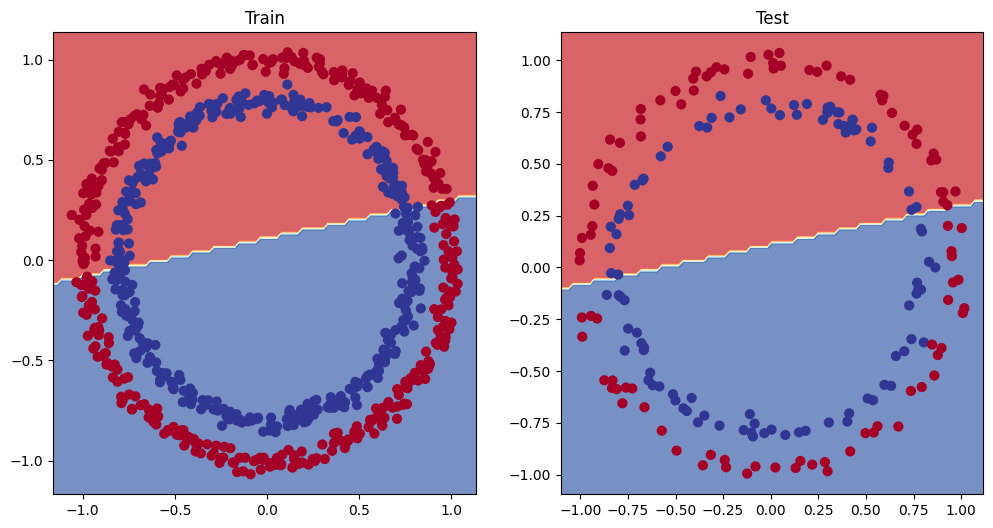

In [344]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")

plot_decision_boundary(model_0,X_train,y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

 since the model is based of linear layers -> the model is creating a linear line from 0.5 prob

 using a non linear layer approach is better for this problem

### 4.1 Improve a model (through experimentation)
  * add more layers - give model more chances to learn the patterns
  * add more hidden units
  * Fit for longer - increase a epoch
  * change the activation functions - `nn.ReLU()` =>  rectified linear unit function element-wise.
    -  The ReLU function is a piecewise linear function that outputs the input directly if it is positive; otherwise, it outputs zero
  * change the learning rate
  * change the loss function

alt : `torch.utils.tensorboard`


these are all from model pov- because it deals with the model prespective (Hyperparameters)
there is another pov- data prespective

In [345]:
X_train.shape,y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [346]:
#Creating a improved model - adding extra layer
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1=nn.Linear(in_features=2,out_features=10)
    #nn.ReLU()
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    #nn.ReLU()
    self.layer_3=nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    #z=self.layer_1(x)
    #z2=nn.ReLU()(z)
    #z=self.layer_2(z)
    #=nn.ReLU()(z3)
    #z=self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1= CircleModelV1().to(device)


In [347]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [348]:
#create a loss fucntion
loss_fn_1=nn.BCEWithLogitsLoss()

#add optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [349]:
#build a training loop
torch.manual_seed(42)
EPOCHS=1000

for epoch in range(EPOCHS):
  model_1.train()

  y_logits=model_1(X_train).squeeze() #make the same shape
  y_logits_prob= torch.round(torch.sigmoid(y_logits))

  #loss
  train_loss=loss_fn_1(y_logits,y_train)
  acc=Accuracy_fn(y_true=y_train, y_pred=y_pred)

  #optimizer
  optimizer.zero_grad

  train_loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    #forward pass
    test_logits=model_1(X_test).squeeze()
    # convert into prob
    test_logits_prob=torch.round(torch.sigmoid(test_logits))
    #loss
    test_loss=loss_fn_1(test_logits,y_test)
    #accuracy
    test_acc=Accuracy_fn(y_true=y_test,y_pred=test_logits_prob)

  if epoch % 100 == 0:
    print(f"epoch:{epoch} Loss:{train_loss:.5f} accuracy:{acc}% | test acc:{test_acc:.2f}% | test loss:{test_loss:.5f}")


epoch:0 Loss:0.69396 accuracy:40000.0% | test acc:51.00% | test loss:0.69261
epoch:100 Loss:0.69359 accuracy:40000.0% | test acc:47.50% | test loss:0.69807
epoch:200 Loss:0.69350 accuracy:40000.0% | test acc:52.00% | test loss:0.69254
epoch:300 Loss:0.69305 accuracy:40000.0% | test acc:46.00% | test loss:0.69546
epoch:400 Loss:0.69309 accuracy:40000.0% | test acc:46.50% | test loss:0.69524
epoch:500 Loss:0.69348 accuracy:40000.0% | test acc:54.00% | test loss:0.69225
epoch:600 Loss:0.69316 accuracy:40000.0% | test acc:50.00% | test loss:0.69324
epoch:700 Loss:0.69308 accuracy:40000.0% | test acc:47.00% | test loss:0.69569
epoch:800 Loss:0.69305 accuracy:40000.0% | test acc:46.50% | test loss:0.69504
epoch:900 Loss:0.69326 accuracy:40000.0% | test acc:51.50% | test loss:0.69304


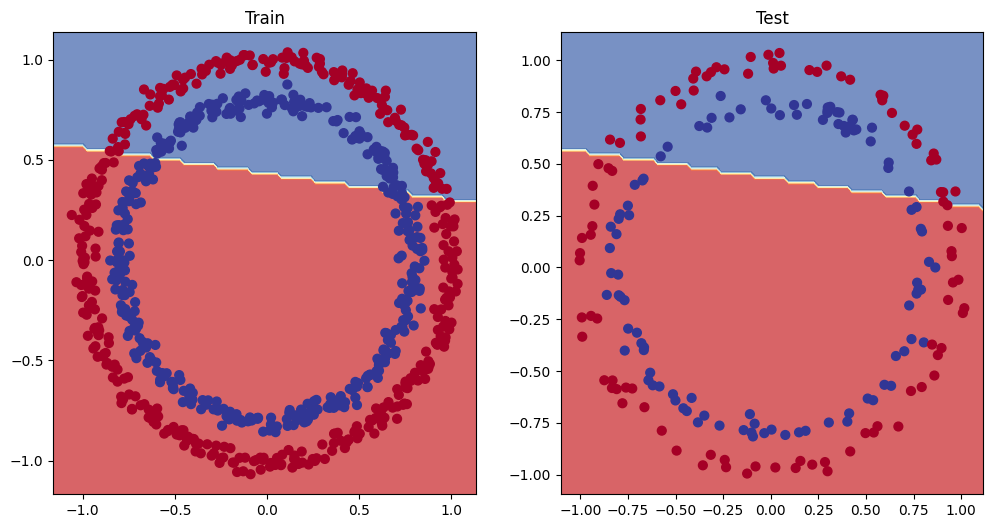

In [350]:
#plot the decision boundary

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")

plot_decision_boundary(model_1,X_train,y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

still the model is performing back - after adding a more hidden layers, and increasing epochs
-> this indicates to change methods to improve other directions


### 4.2 preparing data to see if our model can fit a straight line

-> troubleshooting method to a larger problem is to test out a smaller problem

In [351]:
#create some data
weight=0.7
bias=0.3
start,end,step=0,10,0.1

X_regression=torch.arange(start,end,step).unsqueeze(dim=1)
y_regression=weight*X_regression+bias


In [352]:
#check the data
print(len(X_regression))
X_regression[:5],y_regression[:5]

100


(tensor([[0.0000],
         [0.1000],
         [0.2000],
         [0.3000],
         [0.4000]]),
 tensor([[0.3000],
         [0.3700],
         [0.4400],
         [0.5100],
         [0.5800]]))

In [353]:
train_split=int(0.8*len(X_regression))

X_train_reg=X_regression[:train_split]
X_test_reg=X_regression[train_split:]

y_train_reg=y_regression[:train_split]
y_test_reg=y_regression[train_split:]

#check lens
len(X_train_reg),len(X_test_reg),len(y_train_reg),len(y_test_reg)

(80, 20, 80, 20)

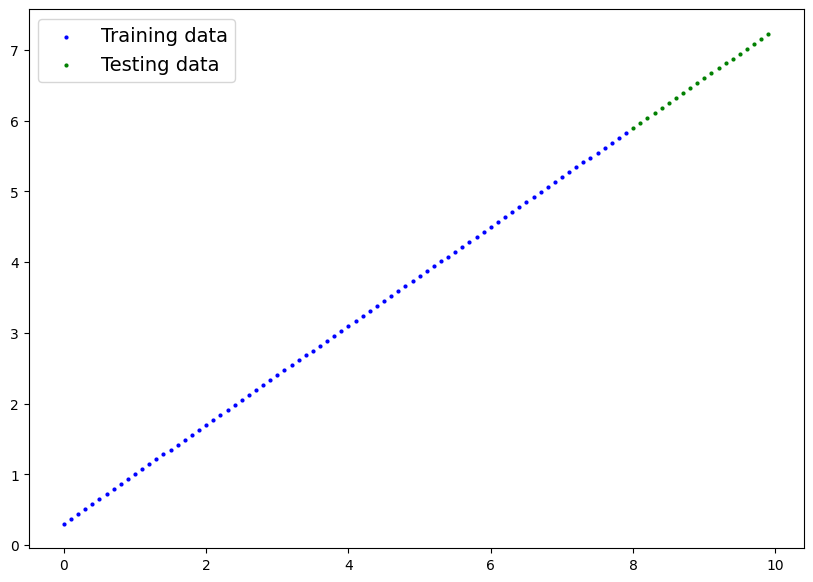

In [354]:
plot_predictions(train_data=X_train_reg,
                 train_labels=y_train_reg,
                 test_data=X_test_reg,
                 test_labels=y_test_reg,
                 predictions=None
                 )

### 4.3 adjusting `model_1` to fit a straight line

In [355]:
X_train_reg.shape,y_train_reg.shape


(torch.Size([80, 1]), torch.Size([80, 1]))

In [356]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.0218, -0.1190],
                      [-0.2549,  0.1736],
                      [-0.0684,  0.1036],
                      [-0.3820,  0.5677],
                      [ 0.3896, -0.2697],
                      [ 0.2840,  0.1187],
                      [ 0.0460, -0.1368],
                      [ 0.3240,  0.0740],
                      [ 0.1035, -0.1739],
                      [-0.0424,  0.4609]])),
             ('layer_1.bias',
              tensor([-0.3843, -0.1067, -0.2654,  0.4460, -0.5096, -0.3529, -0.2423, -0.3891,
                       0.0613, -0.5789])),
             ('layer_2.weight',
              tensor([[ 0.4159, -0.0143,  0.2392,  0.0652, -0.1752,  0.2440,  0.0844,  0.1342,
                        0.0227, -0.0502],
                      [-0.1730, -0.0077,  0.1335,  0.3754, -0.0526, -0.3375, -0.0217, -0.1330,
                       -0.1185, -0.1768],
                      [ 0.0201,  0.0936, -0.2063,  0.2858,  0.0812,  0.2

In [357]:
# same architecuter as model_1 but using nn.sequential
model_2=nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [358]:
#loss and optimizer
loss_fn_2=nn.L1Loss()
optimizer_2=torch.optim.SGD(params=model_2.parameters(),lr=0.01)


In [359]:
#train the model
torch.manual_seed(42)

EPOCHS=1000

for epoch in range(EPOCHS):
  model_2.train()
  y_pred=model_2(X_train_reg)

  loss_train =loss_fn_2(y_pred,y_train_reg)

  optimizer_2.zero_grad()

  loss_train.backward()
  optimizer_2.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred=model_2(X_test_reg)

    test_loss=loss_fn_2(test_pred,y_test_reg)

  if epoch % 100 == 0:
    print(f"epoch:{epoch}  Loss:{loss_train:.5f} | test loss:{test_loss:.5f}")

epoch:0  Loss:2.13993 | test loss:2.77461
epoch:100  Loss:0.12456 | test loss:0.90390
epoch:200  Loss:0.30126 | test loss:0.44655
epoch:300  Loss:0.21389 | test loss:0.46709
epoch:400  Loss:0.27277 | test loss:0.27524
epoch:500  Loss:0.11746 | test loss:0.68118
epoch:600  Loss:0.01277 | test loss:0.82618
epoch:700  Loss:0.19024 | test loss:0.42222
epoch:800  Loss:0.23198 | test loss:0.28310
epoch:900  Loss:0.21707 | test loss:0.29998


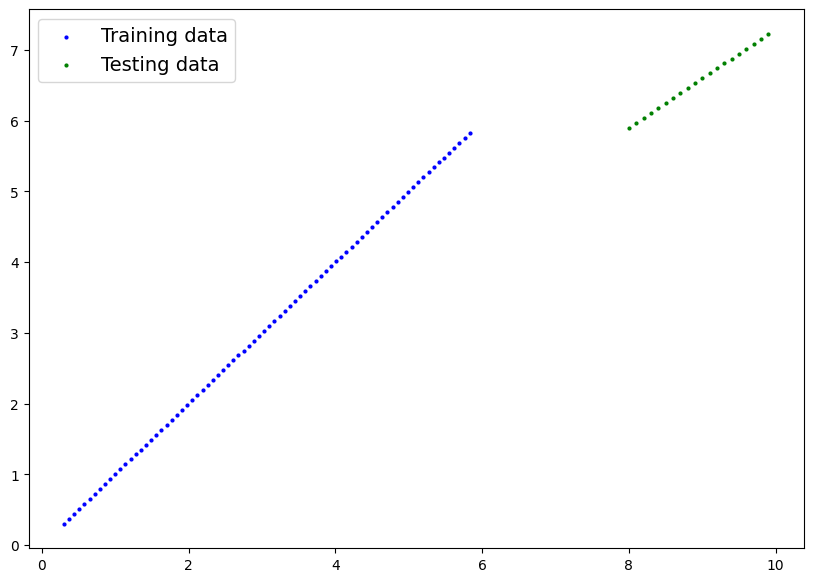

In [360]:
# plot predictions
plot_predictions(train_data=y_train_reg,
                 train_labels=y_train_reg,
                 test_data=X_test_reg,
                 test_labels=y_test_reg)

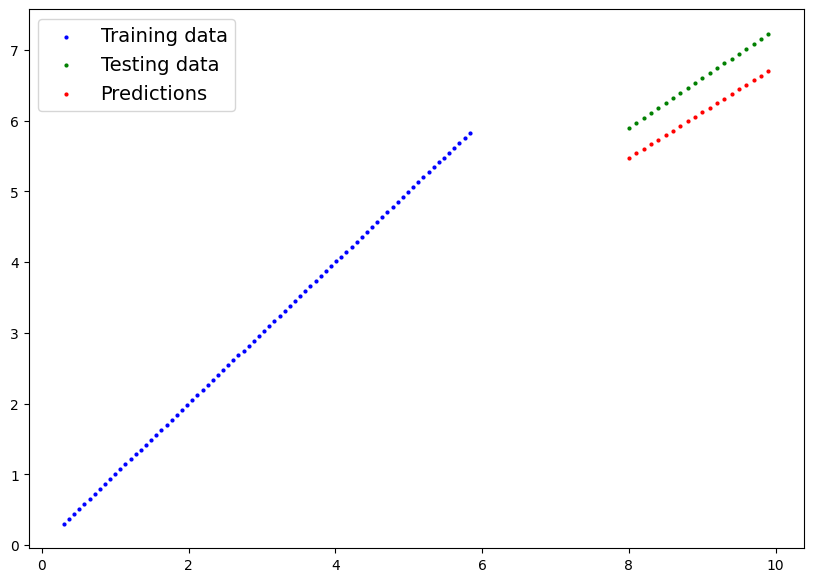

In [361]:
model_2.eval()
with torch.inference_mode():
  y_preds=model_2(X_test_reg)

plot_predictions(train_data=y_train_reg,
                 train_labels=y_train_reg,
                 test_data=X_test_reg,
                 test_labels=y_test_reg,
                 predictions=y_preds)

# Non-Linearity : the missing piece



## A. Reacreating non-linear data

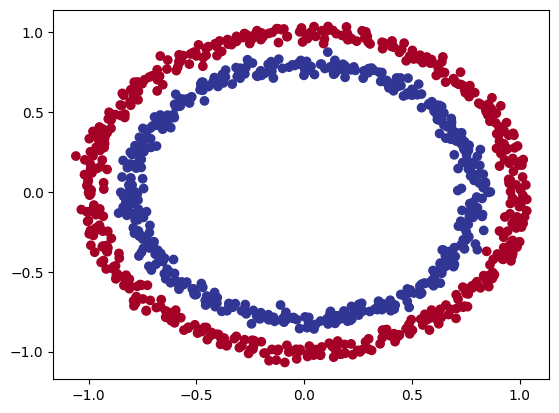

In [365]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples=1000

X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [366]:
import torch
from sklearn.model_selection import train_test_split

X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [367]:
X_train.shape,y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

## B. Non-linear Model